In [63]:
import os
import sys
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout,MaxPooling1D
from tensorflow.keras.models import Sequential
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package punkt to /home/ahmed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ahmed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# # Load the CSV file into a pandas DataFrame
# df = pd.read_csv('/home/ahmed/Desktop/tweets.csv')

# # Shuffle the rows randomly
# df = df.sample(frac=1)

# # Split the DataFrame into two parts: 80% for training and 20% for testing
# train_df = df[:int(len(df)*0.8)]
# test_df = df[int(len(df)*0.8):]

# # Save the two DataFrames into separate CSV files
# train_df.to_csv('train_tweets.csv', index=False)
# test_df.to_csv('test_tweets.csv', index=False)

In [3]:
# Load data
train = pd.read_csv('/home/ahmed/Desktop/20190021_20190042_20190224_S4/train/train_tweets.csv')
test = pd.read_csv('/home/ahmed/Desktop/20190021_20190042_20190224_S4/test/test_tweets.csv')

/home/ahmed/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/ahmed/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#If there is any other label out of (good, neutral, bad)
train.loc[~train['labels'].isin(['good', 'bad', 'neutral']), 'labels'] = 'neutral'
test.loc[~test['labels'].isin(['good', 'bad', 'neutral']), 'labels'] = 'neutral'


In [5]:
train_tweets = train['tweets'].values
train_labels = train['labels'].values

test_tweets = test['tweets'].values
test_labels = test['labels'].values


In [6]:
#train, test contain bad,good,neutral
print(train_labels)
print(train_labels[900])

print(test_labels)
print(test_labels[1000])

print(len(train_tweets))
print(len(train_labels))


print(len(test_tweets))
print(len(test_labels))

['bad' 'good' 'bad' ... 'bad' 'good' 'bad']
neutral
['bad' 'bad' 'neutral' ... 'bad' 'bad' 'bad']
good
175435
175435
43859
43859


In [7]:
# Define a regular expression pattern to match URLs
url_pattern = re.compile(r'https?://\S+|www\.\S+')

# Function to Remove URLs and unimportant charcters
def preprocess_text(text):
    text_without_urls = url_pattern.sub('', str(text))
    text_without_special_chars = re.sub(r"[^a-zA-Z0-9]", " ", text_without_urls)
    return text_without_special_chars


# Function to preprocess tweet with lemmatization
def lemmatize(text):
    
    # Tokenize the text into individual words
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Lemmatize the filtered tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Join the lemmatized tokens back into a string
    preprocessed_text = " ".join(lemmatized_tokens)
    
    return preprocessed_text

In [8]:
print(train_tweets[5])

The cost of learning has declined (YouTube, online courses etc.) So why is the price of education so resistant to change? Is ChatGPT and other AI learning models the cultural reset we need to educate (not just learn) more and cheaply?  @profgalloway https://t.co/ovzd12GoGC


In [9]:
train_tweets = list(map(preprocess_text, train_tweets))
test_tweets = list(map(preprocess_text, test_tweets))

In [10]:
train_tweets = list(map(lemmatize, train_tweets))
test_tweets = list(map(lemmatize, test_tweets))

In [11]:
print(len(train_tweets))
print(len(test_tweets))

175435
43859


In [12]:
print(train_tweets[5])

cost learning declined YouTube online course etc price education resistant change ChatGPT AI learning model cultural reset need educate learn cheaply profgalloway


In [13]:
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_tweets)
tokenizer.fit_on_texts(test_tweets)

train_sequences = tokenizer.texts_to_sequences(train_tweets)
test_sequences = tokenizer.texts_to_sequences(test_tweets)

word_index = tokenizer.word_index
train_tweets = pad_sequences(train_sequences, maxlen=max_len)
test_tweets = pad_sequences(test_sequences, maxlen=max_len)

In [14]:
print(train_tweets[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0  689   95
  209  387  436  349 1139  198   97    1    3   95   43 3854 4991   35
 4930  166]


In [88]:
EMBEDDING_DIM = 100

embeddings_index = {}

with open('/home/ahmed/Desktop/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
         
print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [89]:
print(embeddings_index['awards'])

[ 0.4766     0.15548   -0.17057   -0.37015    1.3021    -0.4373
 -0.076642   0.40814   -0.56646    0.070424  -0.054886  -0.68992
 -0.0046758  0.095351  -0.91242   -0.19537    1.1449    -0.24536
  0.061255   1.2869    -0.87882   -0.78698    0.11753   -0.44307
  1.3691     0.40399    0.61751    0.3009     0.83817   -0.87306
  0.46724    0.43674   -0.085416   1.0479     0.54832   -0.049
 -0.78863    0.81503   -1.9494    -0.01875    0.28641    0.45334
 -0.90373    0.3384     0.17318   -0.36095   -0.26939   -0.67757
 -0.28882   -0.3612    -0.50714   -0.51695   -0.15347    0.68853
 -0.59546   -1.702      0.32584    0.41382    1.3394     0.57089
 -0.52937    1.7442    -0.38348    0.77434   -0.0035287 -0.89848
 -0.34861   -0.039064   0.59802    0.10989    0.040525   0.64655
 -0.45048    0.55286   -0.52969    0.51542   -0.54981   -0.23506
 -0.46078   -0.63185   -0.27618   -0.5117     0.54844   -0.58617
 -1.3677    -0.14594   -0.68627   -0.81571    0.83109   -0.57368
 -0.17038   -0.33908   -0.32

In [90]:
word_index_dictionary = tokenizer.word_index # the dictionary

embedding_matrix = np.zeros((len(word_index_dictionary) + 1, EMBEDDING_DIM))

for word, i in word_index_dictionary.items():
    embedding_vector = embeddings_index.get(word) # if the word is not in this dict. it will remain zeros
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print ('Shape of Embedding Matrix: ',embedding_matrix.shape)


Shape of Embedding Matrix:  (92793, 100)


In [18]:

labels_dict = {'bad': 0, 'good': 1 , 'neutral': 2}

train_labels = [labels_dict[label] for label in train_labels]
test_labels = [labels_dict[label] for label in test_labels]

# print(train_labels)
# print(test_labels)

In [19]:
from keras.utils import to_categorical
# Convert integer labels to one-hot encoding
num_classes = 3
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [20]:
print(train_labels)

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [21]:
print(test_labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# First Trial

In [91]:
# 1st Trial Define CNN model


embedding_layer = Embedding(len(word_index_dictionary) + 1,
                            EMBEDDING_DIM, 
                            weights=[embedding_matrix], 
                            input_length= max_len , trainable=False
                           )
                          


filters = 128
kernel_size = 5
hidden_dims = 128

model1 = Sequential()
model1.add(embedding_layer)
model1.add(Conv1D(filters, kernel_size, activation='relu'))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(hidden_dims, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(3, activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9279300   
                                                                 
 conv1d_59 (Conv1D)          (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_20 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 3)                 387       
                                                     

In [25]:
print(train_tweets.shape)
print(train_labels.shape)
print(test_tweets.shape)
print(test_labels.shape)

(175435, 100)
(175435, 3)
(43859, 100)
(43859, 3)


In [27]:
# Train model 1
epochs = 10
batch_size = 32

hist= model1.fit(train_tweets, train_labels, epochs=epochs, batch_size=batch_size,
                    validation_data=(test_tweets, test_labels))

Epoch 1/10
5483/5483 [==============================] - 54s 10ms/step - loss: 0.4065 - accuracy: 0.8454 - val_loss: 0.4791 - val_accuracy: 0.8171
Epoch 2/10
5483/5483 [==============================] - 57s 10ms/step - loss: 0.3881 - accuracy: 0.8545 - val_loss: 0.5018 - val_accuracy: 0.8092
Epoch 3/10
5483/5483 [==============================] - 57s 10ms/step - loss: 0.3710 - accuracy: 0.8613 - val_loss: 0.4957 - val_accuracy: 0.8174
Epoch 4/10
5483/5483 [==============================] - 57s 10ms/step - loss: 0.3562 - accuracy: 0.8678 - val_loss: 0.4997 - val_accuracy: 0.8186
Epoch 5/10
5483/5483 [==============================] - 59s 11ms/step - loss: 0.3431 - accuracy: 0.8731 - val_loss: 0.5167 - val_accuracy: 0.8143
Epoch 6/10
5483/5483 [==============================] - 57s 10ms/step - loss: 0.3316 - accuracy: 0.8778 - val_loss: 0.5146 - val_accuracy: 0.8138
Epoch 7/10
5483/5483 [==============================] - 57s 10ms/step - loss: 0.3198 - accuracy: 0.8819 - val_loss: 0.5348 -

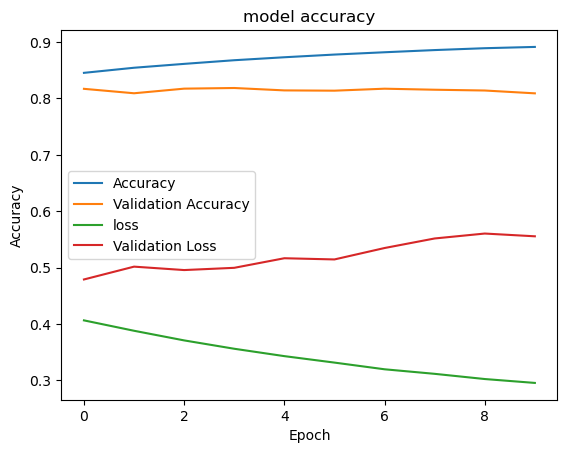

In [28]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [29]:
results = []

In [31]:
# Evaluate model1
test_loss1, test_acc1 = model1.evaluate(test_tweets, test_labels)
print('Test accuracy:', test_acc1)

results.append(test_acc1)

1371/1371 [==============================] - 5s 3ms/step - loss: 0.5556 - accuracy: 0.8091
Test accuracy: 0.8090927600860596


In [33]:
model1.save('model1_cnn_nlp.h5')

In [34]:
user_tweet = 'GPT is a weapon with two sides you should learn how to use it bro,, good luck <33'

#Apply Preprocessing to clean input and pass to model to predict
user_tweet = preprocess_text(user_tweet)
user_tweet = lemmatize(user_tweet)

print(user_tweet)

input_sequences = tokenizer.texts_to_sequences([user_tweet])
user_tweet = pad_sequences(input_sequences, maxlen=max_len)

print(user_tweet)


GPT weapon two side learn use bro good luck 33
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   42 3186  246  597  166   11 1200
    20 1356]]


In [35]:
from keras.models import load_model
saved_model = load_model("model1_cnn_nlp.h5")

output = saved_model.predict(user_tweet)

print(output[0])

#[bad, good, neutral]
# print(output[0][0]) #Negative
# print(output[0][1]) #Positive
# print(output[0][2]) #Neutral

if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("Tweet is " + "Negative")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("Tweet is " + "Positive")
else:
    print("Tweet is " + "Neutral")

1/1 [==============================] - 0s 66ms/step
[0.0359843  0.8805937  0.08342198]
Tweet is Positive


# Second Trial

In [36]:
model2 = Sequential()
model2.add(embedding_layer)
model2.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(3, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9279300   
                                                                 
 conv1d_1 (Conv1D)           (None, 100, 64)           19264     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9,298,759
Trainable params: 19,459
Non-trainable params: 9,279,300
_________________________________________________________________


In [40]:
#Train model2
hist2= model2.fit(train_tweets, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_tweets, test_labels))

Epoch 1/10
2742/2742 [==============================] - 23s 8ms/step - loss: 0.6688 - accuracy: 0.7169 - val_loss: 0.5732 - val_accuracy: 0.7674
Epoch 2/10
2742/2742 [==============================] - 26s 9ms/step - loss: 0.5410 - accuracy: 0.7853 - val_loss: 0.5405 - val_accuracy: 0.7843
Epoch 3/10
2742/2742 [==============================] - 27s 10ms/step - loss: 0.5054 - accuracy: 0.8028 - val_loss: 0.5345 - val_accuracy: 0.7864
Epoch 4/10
2742/2742 [==============================] - 26s 10ms/step - loss: 0.4816 - accuracy: 0.8145 - val_loss: 0.5247 - val_accuracy: 0.7935
Epoch 5/10
2742/2742 [==============================] - 26s 9ms/step - loss: 0.4651 - accuracy: 0.8217 - val_loss: 0.5088 - val_accuracy: 0.8040
Epoch 6/10
2742/2742 [==============================] - 26s 10ms/step - loss: 0.4523 - accuracy: 0.8278 - val_loss: 0.5077 - val_accuracy: 0.8054
Epoch 7/10
2742/2742 [==============================] - 26s 9ms/step - loss: 0.4418 - accuracy: 0.8329 - val_loss: 0.5097 - val

In [41]:
# Evaluate model2
test_loss2, test_acc2 = model2.evaluate(test_tweets, test_labels)
print('Test accuracy:', test_acc2)

results.append(test_acc2)
model2.save('model2_cnn_nlp.h5')

1371/1371 [==============================] - 3s 2ms/step - loss: 0.5039 - accuracy: 0.8098
Test accuracy: 0.8098223805427551


# 3rd Trial

In [50]:
model3 = Sequential()
model3.add(embedding_layer)
model3.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model3.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model3.add(Dropout(0.25))
model3.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model3.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model3.add(GlobalMaxPooling1D())
model3.add(Dropout(0.5))
model3.add(Dense(3, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9279300   
                                                                 
 conv1d_24 (Conv1D)          (None, 100, 64)           19264     
                                                                 
 conv1d_25 (Conv1D)          (None, 100, 64)           12352     
                                                                 
 dropout_8 (Dropout)         (None, 100, 64)           0         
                                                                 
 conv1d_26 (Conv1D)          (None, 100, 128)          24704     
                                                                 
 conv1d_27 (Conv1D)          (None, 100, 128)          49280     
                                                                 
 global_max_pooling1d_8 (Glo  (None, 128)            

In [52]:
#Train model3
hist3= model3.fit(train_tweets, train_labels, epochs=15, batch_size=64,
                    validation_data=(test_tweets, test_labels))

Epoch 1/15
2742/2742 [==============================] - 111s 40ms/step - loss: 0.6772 - accuracy: 0.7183 - val_loss: 0.5467 - val_accuracy: 0.7886
Epoch 2/15
2742/2742 [==============================] - 113s 41ms/step - loss: 0.5428 - accuracy: 0.7914 - val_loss: 0.4820 - val_accuracy: 0.8180
Epoch 3/15
2742/2742 [==============================] - 113s 41ms/step - loss: 0.4934 - accuracy: 0.8162 - val_loss: 0.4647 - val_accuracy: 0.8287
Epoch 4/15
2742/2742 [==============================] - 113s 41ms/step - loss: 0.4662 - accuracy: 0.8287 - val_loss: 0.4410 - val_accuracy: 0.8379
Epoch 5/15
2742/2742 [==============================] - 113s 41ms/step - loss: 0.4478 - accuracy: 0.8387 - val_loss: 0.4297 - val_accuracy: 0.8422
Epoch 6/15
2742/2742 [==============================] - 114s 41ms/step - loss: 0.4332 - accuracy: 0.8456 - val_loss: 0.4269 - val_accuracy: 0.8430
Epoch 7/15
2742/2742 [==============================] - 115s 42ms/step - loss: 0.4229 - accuracy: 0.8492 - val_loss: 0

In [53]:
# Evaluate model3
test_loss3, test_acc3 = model3.evaluate(test_tweets, test_labels)
print('Test accuracy:', test_acc3)

results.append(test_acc3)
model3.save('model3_cnn_nlp.h5')

1371/1371 [==============================] - 8s 6ms/step - loss: 0.3957 - accuracy: 0.8610
Test accuracy: 0.8609863519668579


In [57]:
results=[]
results.append(test_acc1)
results.append(test_acc2)
results.append(test_acc3)

[0.8090927600860596, 0.8098223805427551, 0.8609863519668579]

# 4th Trial

In [67]:
model4 = Sequential()
model4.add(embedding_layer)
model4.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model4.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model4.add(Dropout(0.25))
model4.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model4.add(GlobalMaxPooling1D())
model4.add(Dense(3, activation='softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9279300   
                                                                 
 conv1d_43 (Conv1D)          (None, 100, 64)           19264     
                                                                 
 conv1d_44 (Conv1D)          (None, 100, 64)           12352     
                                                                 
 dropout_10 (Dropout)        (None, 100, 64)           0         
                                                                 
 conv1d_45 (Conv1D)          (None, 100, 128)          24704     
                                                                 
 global_max_pooling1d_13 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                     

In [68]:
#Train model4
hist4= model4.fit(train_tweets, train_labels, epochs=10, batch_size=128,
                    validation_data=(test_tweets, test_labels))

Epoch 1/10
1371/1371 [==============================] - 73s 53ms/step - loss: 0.6589 - accuracy: 0.7206 - val_loss: 0.5562 - val_accuracy: 0.7769
Epoch 2/10
1371/1371 [==============================] - 71s 51ms/step - loss: 0.5164 - accuracy: 0.7972 - val_loss: 0.4881 - val_accuracy: 0.8121
Epoch 3/10
1371/1371 [==============================] - 79s 58ms/step - loss: 0.4649 - accuracy: 0.8237 - val_loss: 0.4631 - val_accuracy: 0.8280
Epoch 4/10
1371/1371 [==============================] - 83s 60ms/step - loss: 0.4312 - accuracy: 0.8395 - val_loss: 0.4452 - val_accuracy: 0.8364
Epoch 5/10
1371/1371 [==============================] - 80s 58ms/step - loss: 0.4081 - accuracy: 0.8500 - val_loss: 0.4456 - val_accuracy: 0.8361
Epoch 6/10
1371/1371 [==============================] - 80s 58ms/step - loss: 0.3928 - accuracy: 0.8578 - val_loss: 0.4230 - val_accuracy: 0.8491
Epoch 7/10
1371/1371 [==============================] - 82s 60ms/step - loss: 0.3789 - accuracy: 0.8633 - val_loss: 0.4252 -

In [69]:
# Evaluate model4
test_loss4, test_acc4 = model4.evaluate(test_tweets, test_labels)
print('Test accuracy:', test_acc4)

results.append(test_acc4)
model4.save('model4_cnn_nlp.h5')

1371/1371 [==============================] - 5s 4ms/step - loss: 0.4369 - accuracy: 0.8407
Test accuracy: 0.8407168388366699


# 5th Trial

In [84]:
model5 = Sequential()
model5.add(embedding_layer)

model5.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model5.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model5.add(Dropout(0.2))
model5.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model5.add(GlobalMaxPooling1D())
model5.add(Dropout(0.5))

model5.add(Dense(3, activation='softmax'))

model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 200)          18558600  
                                                                 
 conv1d_56 (Conv1D)          (None, 100, 64)           38464     
                                                                 
 conv1d_57 (Conv1D)          (None, 100, 64)           12352     
                                                                 
 dropout_17 (Dropout)        (None, 100, 64)           0         
                                                                 
 conv1d_58 (Conv1D)          (None, 100, 128)          24704     
                                                                 
 global_max_pooling1d_19 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                     

In [86]:
#Train model5
hist5= model5.fit(train_tweets, train_labels, epochs=10, batch_size=128,
                    validation_data=(test_tweets, test_labels))

Epoch 1/10
1371/1371 [==============================] - 79s 58ms/step - loss: 0.6144 - accuracy: 0.7540 - val_loss: 0.5224 - val_accuracy: 0.8038
Epoch 2/10
1371/1371 [==============================] - 81s 59ms/step - loss: 0.5197 - accuracy: 0.8031 - val_loss: 0.4824 - val_accuracy: 0.8223
Epoch 3/10
1371/1371 [==============================] - 81s 59ms/step - loss: 0.4795 - accuracy: 0.8225 - val_loss: 0.4681 - val_accuracy: 0.8254
Epoch 4/10
1371/1371 [==============================] - 82s 60ms/step - loss: 0.4541 - accuracy: 0.8326 - val_loss: 0.4570 - val_accuracy: 0.8313
Epoch 5/10
1371/1371 [==============================] - 83s 60ms/step - loss: 0.4347 - accuracy: 0.8418 - val_loss: 0.4420 - val_accuracy: 0.8408
Epoch 6/10
1371/1371 [==============================] - 85s 62ms/step - loss: 0.4201 - accuracy: 0.8481 - val_loss: 0.4572 - val_accuracy: 0.8289
Epoch 7/10
1371/1371 [==============================] - 86s 63ms/step - loss: 0.4077 - accuracy: 0.8532 - val_loss: 0.4391 -

In [87]:
# Evaluate model5
test_loss5, test_acc5 = model5.evaluate(test_tweets, test_labels,batch_size=128)
print('Test accuracy:', test_acc5)

results.append(test_acc5)
model5.save('model5_cnn_nlp.h5')

343/343 [==============================] - 5s 14ms/step - loss: 0.4359 - accuracy: 0.8418
Test accuracy: 0.8417884707450867


# 6th Trial

In [97]:
#model 6
model6 = tf.keras.Sequential([
    
    # Embedding layer
    embedding_layer,
    
    # Convolutional layers
    Conv1D(64, 5, activation='relu'),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    
    # Dense layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

In [98]:
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model6.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9279300   
                                                                 
 conv1d_66 (Conv1D)          (None, 96, 64)            32064     
                                                                 
 conv1d_67 (Conv1D)          (None, 92, 128)           41088     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 46, 128)          0         
 g1D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 46, 128)           0         
                                                                 
 conv1d_68 (Conv1D)          (None, 42, 128)           82048     
                                                     

In [100]:
#Train model6
hist6= model6.fit(train_tweets, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_tweets, test_labels))

Epoch 1/10
2742/2742 [==============================] - 116s 42ms/step - loss: 0.6257 - accuracy: 0.7464 - val_loss: 0.5118 - val_accuracy: 0.8001
Epoch 2/10
2742/2742 [==============================] - 118s 43ms/step - loss: 0.5028 - accuracy: 0.8110 - val_loss: 0.4640 - val_accuracy: 0.8238
Epoch 3/10
2742/2742 [==============================] - 118s 43ms/step - loss: 0.4520 - accuracy: 0.8352 - val_loss: 0.4388 - val_accuracy: 0.8378
Epoch 4/10
2742/2742 [==============================] - 119s 43ms/step - loss: 0.4231 - accuracy: 0.8497 - val_loss: 0.4211 - val_accuracy: 0.8456
Epoch 5/10
2742/2742 [==============================] - 119s 43ms/step - loss: 0.4001 - accuracy: 0.8592 - val_loss: 0.4158 - val_accuracy: 0.8485
Epoch 6/10
2742/2742 [==============================] - 119s 43ms/step - loss: 0.3847 - accuracy: 0.8664 - val_loss: 0.4132 - val_accuracy: 0.8497
Epoch 7/10
2742/2742 [==============================] - 118s 43ms/step - loss: 0.3718 - accuracy: 0.8714 - val_loss: 0

In [101]:
# Evaluate model6
test_loss6, test_acc6 = model6.evaluate(test_tweets, test_labels)
print('Test accuracy:', test_acc6)

results.append(test_acc6)
model6.save('model6_cnn_nlp.h5')

1371/1371 [==============================] - 10s 7ms/step - loss: 0.4179 - accuracy: 0.8504
Test accuracy: 0.8504070043563843


# 7th Trial

In [102]:
#model 7
model7 = tf.keras.Sequential([
    
    # Embedding layer
    embedding_layer,
    
    # Convolutional layers
    Conv1D(64, 5, activation='relu'),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    
    # Dense layers
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(3, activation='softmax')
])

In [103]:
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model7.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9279300   
                                                                 
 conv1d_70 (Conv1D)          (None, 96, 64)            32064     
                                                                 
 conv1d_71 (Conv1D)          (None, 92, 128)           41088     
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 46, 128)          0         
 g1D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 46, 128)           0         
                                                                 
 conv1d_72 (Conv1D)          (None, 42, 128)           82048     
                                                     

In [104]:
#Train model7
hist7 = model7.fit(train_tweets, train_labels, epochs=15, batch_size=32,
                    validation_data=(test_tweets, test_labels))

Epoch 1/15
2742/2742 [==============================] - 112s 40ms/step - loss: 0.6529 - accuracy: 0.7266 - val_loss: 0.5402 - val_accuracy: 0.7896
Epoch 2/15
2742/2742 [==============================] - 116s 42ms/step - loss: 0.4988 - accuracy: 0.8094 - val_loss: 0.4699 - val_accuracy: 0.8228
Epoch 3/15
2742/2742 [==============================] - 116s 42ms/step - loss: 0.4425 - accuracy: 0.8364 - val_loss: 0.4388 - val_accuracy: 0.8390
Epoch 4/15
2742/2742 [==============================] - 117s 43ms/step - loss: 0.4101 - accuracy: 0.8519 - val_loss: 0.4184 - val_accuracy: 0.8483
Epoch 5/15
2742/2742 [==============================] - 117s 43ms/step - loss: 0.3883 - accuracy: 0.8620 - val_loss: 0.4159 - val_accuracy: 0.8490
Epoch 6/15
2742/2742 [==============================] - 121s 44ms/step - loss: 0.3710 - accuracy: 0.8690 - val_loss: 0.4041 - val_accuracy: 0.8574
Epoch 7/15
2742/2742 [==============================] - 118s 43ms/step - loss: 0.3549 - accuracy: 0.8764 - val_loss: 0

In [106]:
# Evaluate model7
test_loss7, test_acc7 = model7.evaluate(test_tweets, test_labels)
print('Test accuracy:', test_acc7)

results.append(test_acc7)
model7.save('model7_cnn_nlp.h5')

1371/1371 [==============================] - 8s 6ms/step - loss: 0.4200 - accuracy: 0.8578
Test accuracy: 0.8577942848205566


# 8th Trial

In [107]:
#model 8
model8 = tf.keras.Sequential([
    
    # Embedding layer
    embedding_layer,
    
    # Convolutional layers
    Conv1D(64, 5, activation='relu'),
    Dropout(0.25),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    
    # Dense layers
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(3, activation='softmax')
])

In [108]:
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model8.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9279300   
                                                                 
 conv1d_74 (Conv1D)          (None, 96, 64)            32064     
                                                                 
 dropout_26 (Dropout)        (None, 96, 64)            0         
                                                                 
 conv1d_75 (Conv1D)          (None, 92, 128)           41088     
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 46, 128)          0         
 g1D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 46, 128)           0         
                                                     

In [110]:
#Train model8
hist8 = model8.fit(train_tweets, train_labels, epochs=5, batch_size=256,
                    validation_data=(test_tweets, test_labels))

Epoch 1/5
686/686 [==============================] - 116s 170ms/step - loss: 0.3859 - accuracy: 0.8631 - val_loss: 0.3955 - val_accuracy: 0.8589
Epoch 2/5
686/686 [==============================] - 125s 182ms/step - loss: 0.3754 - accuracy: 0.8681 - val_loss: 0.3859 - val_accuracy: 0.8643
Epoch 3/5
686/686 [==============================] - 126s 183ms/step - loss: 0.3717 - accuracy: 0.8691 - val_loss: 0.3866 - val_accuracy: 0.8624
Epoch 4/5
686/686 [==============================] - 125s 182ms/step - loss: 0.3679 - accuracy: 0.8717 - val_loss: 0.3841 - val_accuracy: 0.8647
Epoch 5/5
686/686 [==============================] - 131s 191ms/step - loss: 0.3640 - accuracy: 0.8724 - val_loss: 0.3814 - val_accuracy: 0.8659


In [111]:
# Evaluate model8
test_loss8, test_acc8 = model8.evaluate(test_tweets, test_labels)
print('Test accuracy:', test_acc8)

results.append(test_acc8)
model8.save('model8_cnn_nlp.h5')

1371/1371 [==============================] - 9s 7ms/step - loss: 0.3814 - accuracy: 0.8659
Test accuracy: 0.8659340143203735


In [129]:
print(results)


[0.8090927600860596, 0.8098223805427551, 0.8609863519668579, 0.8407168388366699, 0.8417884707450867, 0.8504070043563843, 0.8577942848205566, 0.8577942848205566, 0.8659340143203735]


In [155]:
#best trials
accuracies=[]
accuracies.append(test_acc1)
accuracies.append(test_acc4)
accuracies.append(test_acc6)
accuracies.append(test_acc7)
accuracies.append(test_acc8)

In [156]:
print(accuracies)

[0.8090927600860596, 0.8407168388366699, 0.8504070043563843, 0.8577942848205566, 0.8659340143203735]


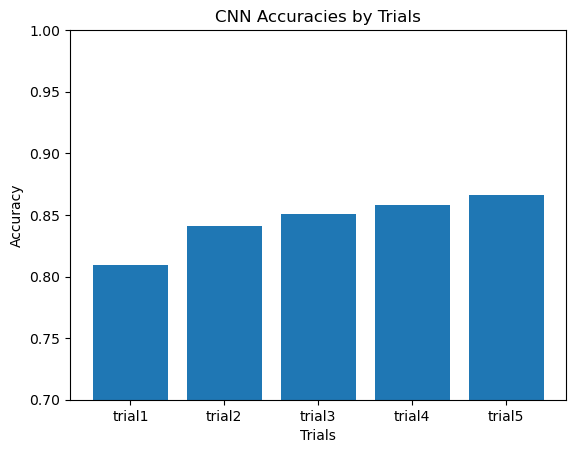

In [160]:
import matplotlib.pyplot as plt

# Replace these with your actual trials and corresponding accuracies
trials = ["trial1", "trial2", "trial3", "trial4", "trial5"]

# Create a bar plot of the accuracies with the trials on the x-axis
plt.bar(trials, accuracies)

# Add labels and a title to the plot
plt.xlabel('Trials')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.title('CNN Accuracies by Trials')

# Display the plot
plt.show()

In [163]:
user_tweet = input('Enter your new tweet: ')

#Apply Preprocessing to clean input and pass to model to predict
user_tweet = preprocess_text(user_tweet)
user_tweet = lemmatize(user_tweet)
input_sequences = tokenizer.texts_to_sequences([user_tweet])
user_tweet = pad_sequences(input_sequences, maxlen=max_len)

Enter your new tweet: No no gpt is very danger to people :(, you should stop using it bro!! take care


In [164]:
from keras.models import load_model
saved_model = load_model("model8_cnn_nlp.h5")

output = saved_model.predict(user_tweet)

print(output[0])
#[bad, good, neutral]

if output[0][0] > output[0][1] and output[0][0] > output[0][2]:
    print("Tweet is " + "Negative")
elif output[0][1] > output[0][0] and output[0][1] > output[0][2]:
    print("Tweet is " + "Positive")
else:
    print("Tweet is " + "Neutral")

1/1 [==============================] - 0s 86ms/step
[0.60095525 0.06257142 0.33647332]
Tweet is Negative
